In [1]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /opt/conda/lib/python3.6/site-packages (19.0.3)


In [2]:
!conda install pandas


Solving environment: done

# All requested packages already installed.



In [3]:
!conda install scikit-learn

Solving environment: done

# All requested packages already installed.



In [4]:
!pip install missingno

In [34]:
import numpy as np
import missingno as msno
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as sm # error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
# from sklearn.cross_validation import ShuffleSplit,train_test_split # No module named 'sklearn.cross_validation'
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy import stats
from scipy.stats import norm, skew

ImportError: cannot import name 'ShuffleSplit'

In [11]:
# the following line gets the bucket name attached to our cluster
bucket = spark._jsc.hadoopConfiguration().get("fs.gs.system.bucket")

# specifying the path to our bucket where the data is located (no need to edit this path anymore)
data = "gs://" + bucket + "/data/"
!gsutil ls {data + "DC_Properties.csv"}

gs://is843_bigdaddydata/data/DC_Properties.csv


In [12]:
df = spark.read.format("csv")\
  .option("header", "true")\
  .option("inferSchema", "true")\
  .load(data + "DC_Properties.csv")
#per 01-EDA.ipynb:
df = df.repartition(20)
print("data was re-partitioned to {} partitions!".format(df.rdd.getNumPartitions()))

spark.conf.set("spark.sql.shuffle.partitions", "20")

df.cache()

data was re-partitioned to 20 partitions!


DataFrame[_c0: int, BATHRM: int, HF_BATHRM: int, HEAT: string, AC: string, NUM_UNITS: double, ROOMS: int, BEDRM: int, AYB: double, YR_RMDL: double, EYB: int, STORIES: double, SALEDATE: timestamp, PRICE: double, QUALIFIED: string, SALE_NUM: int, GBA: double, BLDG_NUM: int, STYLE: string, STRUCT: string, GRADE: string, CNDTN: string, EXTWALL: string, ROOF: string, INTWALL: string, KITCHENS: double, FIREPLACES: int, USECODE: int, LANDAREA: int, GIS_LAST_MOD_DTTM: timestamp, SOURCE: string, CMPLX_NUM: double, LIVING_GBA: double, FULLADDRESS: string, CITY: string, STATE: string, ZIPCODE: double, NATIONALGRID: string, LATITUDE: double, LONGITUDE: double, ASSESSMENT_NBHD: string, ASSESSMENT_SUBNBHD: string, CENSUS_TRACT: double, CENSUS_BLOCK: string, WARD: string, SQUARE: string, X: double, Y: double, QUADRANT: string]

In [13]:
dc = df.toPandas()

In [14]:
# all per: kaggle.com/ashishaggarwal12/dc-properties/notebook
dc_na = (dc.isnull().sum() / len(dc)) * 100
dc_na = dc_na.drop(dc_na[dc_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing %' :dc_na})
missing_data.head(20)

,Missing %
CMPLX_NUM,67.122555
LIVING_GBA,67.122555
YR_RMDL,49.088118
PRICE,38.212221
FULLADDRESS,33.290135
NATIONALGRID,33.283215
CENSUS_BLOCK,33.283215
CITY,33.283215
STATE,33.283215
STORIES,32.905125


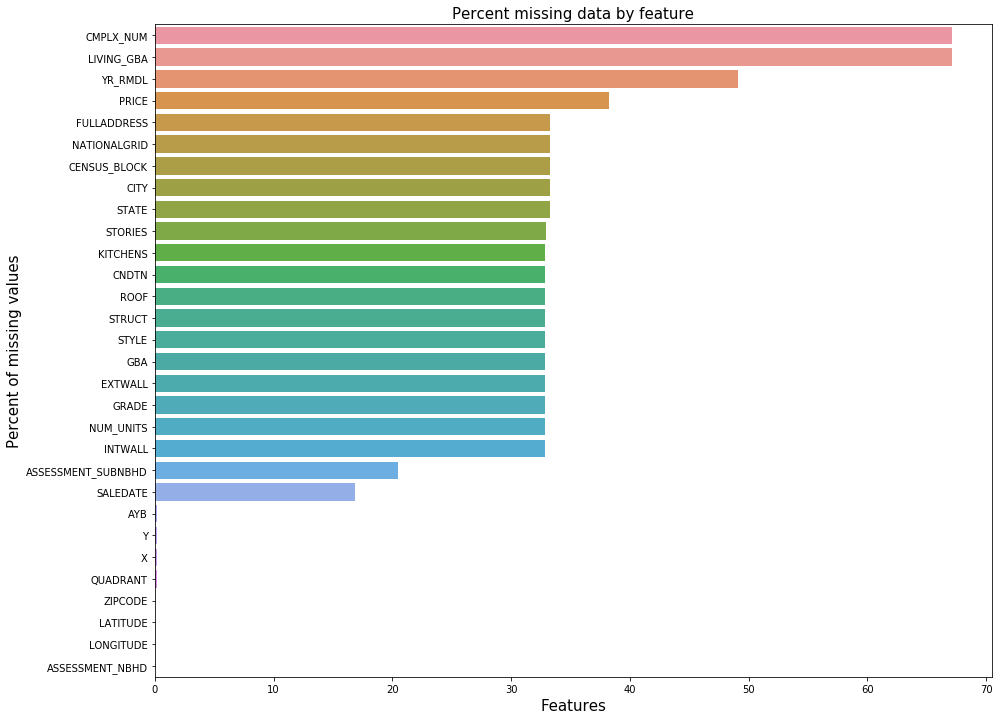

In [15]:
f, ax = plt.subplots(figsize=(15, 12))
sns.barplot(y=dc_na.index, x=dc_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.show()

In [16]:
dc_clean=dc

In [17]:
dc_clean=dc_clean.drop(['NATIONALGRID','ASSESSMENT_SUBNBHD','CENSUS_BLOCK','X','Y','QUADRANT'], axis=1)

dc_clean.NUM_UNITS[dc_clean.NUM_UNITS.isnull()] =  dc_clean.NUM_UNITS.mode().iloc[0]

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [18]:
dc_clean.loc[dc_clean['YR_RMDL'].isnull(), 'YR_RMDL'] = dc_clean['EYB']
dc_clean.loc[dc_clean['AYB'].isnull(), 'AYB'] = dc_clean['EYB']
dc_clean.STORIES=dc_clean.STORIES.round()
dc_clean.STORIES[dc_clean.STORIES.isnull()] =  dc_clean.STORIES.mode().iloc[0]
dc_clean.GBA[dc_clean.GBA.isnull()] =  dc_clean.GBA.mean()
dc_clean.STYLE[dc_clean.STYLE.isnull()] =  dc_clean.STYLE.mode().iloc[0]
dc_clean.STRUCT[dc_clean.STRUCT.isnull()] =  dc_clean.STRUCT.mode().iloc[0]
dc_clean.GRADE[dc_clean.GRADE.isnull()] =  dc_clean.GRADE.mode().iloc[0]
dc_clean.CNDTN[dc_clean.CNDTN.isnull()] =  dc_clean.CNDTN.mode().iloc[0]
dc_clean.EXTWALL[dc_clean.EXTWALL.isnull()] =  dc_clean.EXTWALL.mode().iloc[0]
dc_clean.ROOF[dc_clean.ROOF.isnull()] =  dc_clean.ROOF.mode().iloc[0]
dc_clean.INTWALL[dc_clean.INTWALL.isnull()] =  dc_clean.INTWALL.mode().iloc[0]
dc_clean.KITCHENS[dc_clean.KITCHENS.isnull()] =  dc_clean.KITCHENS.mode().iloc[0]
dc_clean.LIVING_GBA[dc_clean.LIVING_GBA.isnull()] =  dc_clean.LIVING_GBA.median()

dc_clean['CMPLX_NUM1'] = dc_clean['FULLADDRESS'].str[0:4]
dc_clean.loc[dc_clean['CMPLX_NUM'].isnull(), 'CMPLX_NUM'] = dc_clean['CMPLX_NUM1']
dc_clean.CMPLX_NUM[dc_clean.CMPLX_NUM.isnull()] =  dc_clean.CMPLX_NUM.mode().iloc[0]

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

In [19]:
dc_clean.CITY[dc_clean.CITY.isnull()] =  'WASHINGTON'
dc_clean.STATE[dc_clean.STATE.isnull()] =  'DC'

# this could also be a reason why LONGITUDE plays such a big role later on
# author is replacing all NULLs with a specific value
dc_clean.LATITUDE[dc_clean.LATITUDE.isnull()] =  38.9146833
dc_clean.LONGITUDE[dc_clean.LONGITUDE.isnull()] =  -77.04076447

dc_clean=dc_clean.drop(['FULLADDRESS','CMPLX_NUM1'], axis=1)

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value

In [21]:
unknown_data=dc_clean[dc_clean.PRICE.isnull()]
unknown_data.rename(columns={"_c0": "id"}, inplace= True)
unknown_data.set_index("id", inplace = True)

dc_clean = dc_clean[dc_clean.PRICE.notnull()]
dc_clean.rename(columns={"_c0": "id"}, inplace= True)
dc_clean.set_index("id", inplace = True)
dc_clean.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LIVING_GBA,CITY,STATE,ZIPCODE,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,CENSUS_TRACT,WARD,SQUARE
id,,,,,,,,,,,,,,,,,,,,,
63583,3,0,Hot Water Rad,N,1.0,9,3,1927.0,2012.0,2004,...,783.0,WASHINGTON,DC,20011.0,38.962906,-77.013095,Chillum,1902.0,Ward 4,3376
4041,4,1,Hot Water Rad,N,2.0,7,3,1920.0,2009.0,1972,...,783.0,WASHINGTON,DC,20009.0,38.910920,-77.030313,Old City 2,5001.0,Ward 2,0241
448,1,0,Hot Water Rad,N,1.0,6,3,1900.0,1957.0,1957,...,783.0,WASHINGTON,DC,20009.0,38.917448,-77.040115,Old City 2,4201.0,Ward 1,0150
53272,1,1,Forced Air,Y,1.0,6,3,1906.0,2015.0,1967,...,783.0,WASHINGTON,DC,20001.0,38.917592,-77.016587,Ledroit Park,3400.0,Ward 1,3085
57060,3,1,Forced Air,Y,1.0,8,3,1931.0,2011.0,1964,...,783.0,WASHINGTON,DC,20011.0,38.950345,-77.017795,Petworth,2202.0,Ward 4,3252


In [22]:
dc_clean = pd.get_dummies(dc_clean, prefix='HEAT_', columns=['HEAT'])
dc_clean = pd.get_dummies(dc_clean, prefix='AC_', columns=['AC'])
dc_clean = pd.get_dummies(dc_clean, prefix='QUALIFIED_', columns=['QUALIFIED'])
dc_clean = pd.get_dummies(dc_clean, prefix='STYLE_', columns=['STYLE'])
dc_clean = pd.get_dummies(dc_clean, prefix='STRUCT_', columns=['STRUCT'])
dc_clean = pd.get_dummies(dc_clean, prefix='GRADE_', columns=['GRADE'])
dc_clean = pd.get_dummies(dc_clean, prefix='CNDTN_', columns=['CNDTN'])
dc_clean = pd.get_dummies(dc_clean, prefix='EXTWALL_', columns=['EXTWALL'])
dc_clean = pd.get_dummies(dc_clean, prefix='ROOF_', columns=['ROOF'])
dc_clean = pd.get_dummies(dc_clean, prefix='INTWALL_', columns=['INTWALL'])
dc_clean = pd.get_dummies(dc_clean, prefix='SOURCE_', columns=['SOURCE'])
dc_clean = pd.get_dummies(dc_clean, prefix='WARD_', columns=['WARD'])

> ***Performing Stepwise regression to find the most significant variables***

> link: https://www.kaggle.com/ashishaggarwal12/dc-properties#Performing-Stepwise-regression-to-find-the-most-significant-variables

> skipping ahead

In [23]:
# yadda yadda
X = dc_clean[['WARD__Ward 3', 'QUALIFIED__Q', 'HEAT__Ht Pump', 'YR_RMDL', 'QUALIFIED__U', 'EYB', 'LIVING_GBA',
              'STRUCT__Single', 'LATITUDE', 'FIREPLACES', 'GRADE__Very Good', 'GRADE__Good Quality', 'AYB', 
              'GRADE__Excellent', 'WARD__Ward 2', 'CENSUS_TRACT', 'LONGITUDE', 'SALE_NUM', 'WARD__Ward 4',
              'ZIPCODE', 'WARD__Ward 7', 'STYLE__3 Story', 'GRADE__Superior', 'STRUCT__Semi-Detached', 
              'GRADE__Exceptional-C','BATHRM', 'HF_BATHRM', 'NUM_UNITS', 'ROOMS', 'BEDRM']]
y = dc_clean['PRICE']

# Splitting the train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8 , random_state=100)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


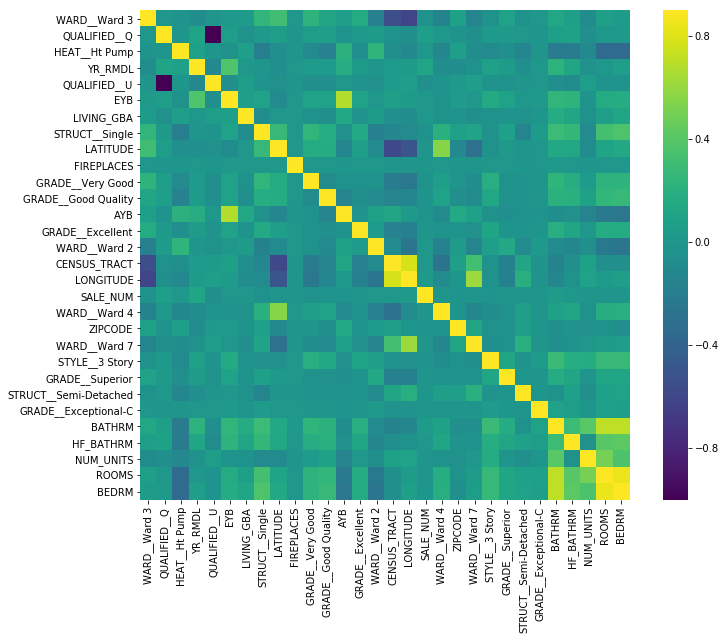

In [24]:
corrmat = X_train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True,cmap = "viridis")
plt.show()
# IT LOOKS SIMILARRRRR

SKIPPING AHEAD Againn

Gradient Boosting regression model and prediction by tuning parameters
> https://www.kaggle.com/ashishaggarwal12/dc-properties#Gradient-Boosting-regression-model-and-prediction-by-tuning-parameters

In [25]:
gbr1=GradientBoostingRegressor(n_estimators=100) 
gbr1.fit(X_train, y_train) 
pred_gbr1=gbr1.predict(X_test)
print("MSE for test",mean_squared_error(y_test,pred_gbr1))
print("R2 for test",r2_score(y_test,pred_gbr1))
print("Train score",gbr1.score(X_train, y_train))
print("Test score",gbr1.score(X_test, y_test))

MSE for test 5374190727093.962
R2 for test 0.9059728692479148
Train score 0.8936282334912506
Test score 0.9059728692479148


In [27]:
feature_importances_gbr1 = pd.DataFrame(gbr1.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances_gbr1

,importance
LONGITUDE,3.492479e-01
QUALIFIED__Q,2.459036e-01
QUALIFIED__U,1.804329e-01
CENSUS_TRACT,1.478496e-01
AYB,6.054420e-02
ROOMS,3.497099e-03
LIVING_GBA,3.280361e-03
EYB,2.521799e-03
YR_RMDL,1.967617e-03
SALE_NUM,1.275125e-03


Text(0.5, 1.0, 'Feature importance using GBR model')

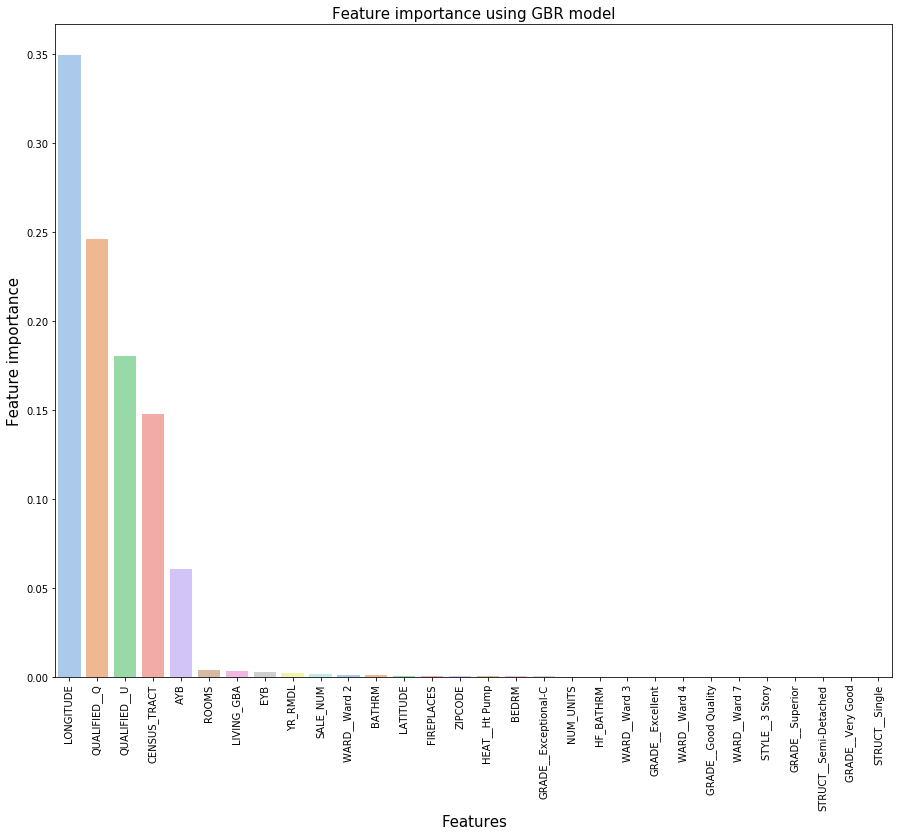

In [28]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=feature_importances_gbr1.index, y=feature_importances_gbr1.importance,palette="pastel")
plt.xlabel('Features', fontsize=15)
plt.ylabel('Feature importance', fontsize=15)
plt.title('Feature importance using GBR model', fontsize=15)

In [29]:
gbr2 = GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls', max_depth=6, 
                          max_features=1.0, max_leaf_nodes=None, min_samples_leaf=3, 
                          min_samples_split=2, n_estimators=100, random_state=None, subsample=1.0, 
                          verbose=0, warm_start=False) 
gbr2.fit(X_train,y_train)
pred_gbr2=gbr2.predict(X_test)
print("MSE for test",mean_squared_error(y_test,pred_gbr2))
print("R2 for test",r2_score(y_test,pred_gbr2))
print("Train score",gbr2.score(X_train, y_train))
print("Test score",gbr2.score(X_test, y_test))

MSE for test 2057051435297.9243
R2 for test 0.9640097171662697
Train score 0.9724606967257562
Test score 0.9640097171662697


In [30]:
feature_importances_gbr2 = pd.DataFrame(gbr2.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances_gbr2

,importance
LONGITUDE,0.548492
QUALIFIED__Q,0.192292
QUALIFIED__U,0.174076
SALE_NUM,0.029478
HEAT__Ht Pump,0.012932
LIVING_GBA,0.012323
EYB,0.010881
CENSUS_TRACT,0.008469
BEDRM,0.002912
YR_RMDL,0.001830


Text(0.5, 1.0, 'Feature importance using GBR model')

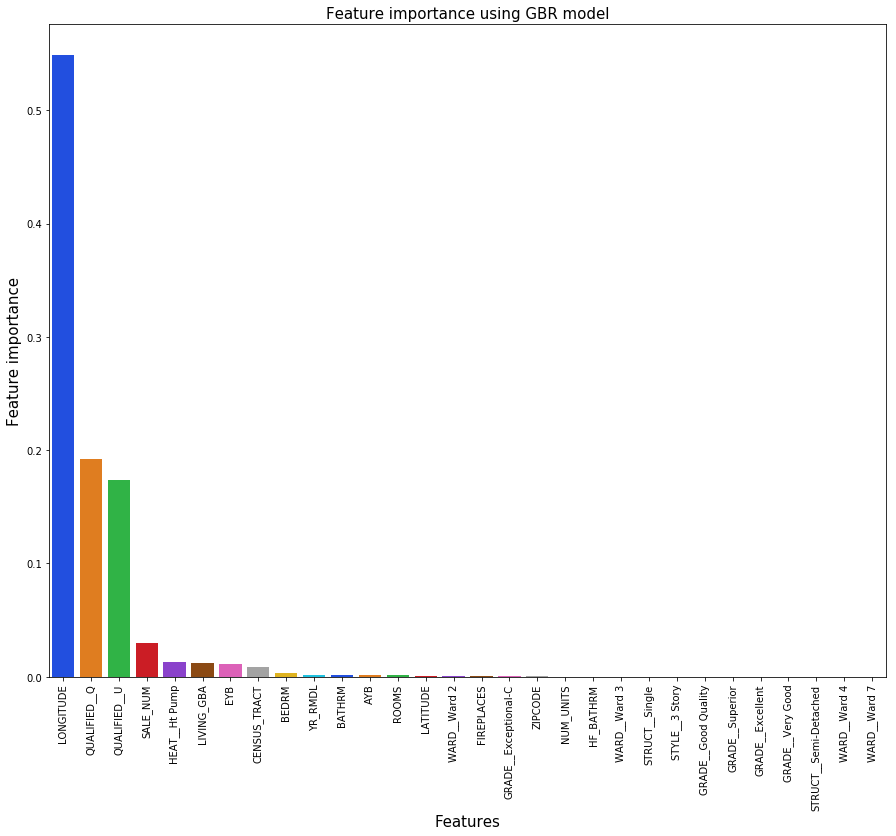

In [31]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=feature_importances_gbr2.index, y=feature_importances_gbr2.importance,palette="bright")
plt.xlabel('Features', fontsize=15)
plt.ylabel('Feature importance', fontsize=15)
plt.title('Feature importance using GBR model', fontsize=15)

In [32]:
# Parameter tuning using Grid search

def GradientBooster(param_grid, n_jobs): 
    estimator = GradientBoostingRegressor()
    cv = ShuffleSplit(X_train.shape[0], n_iter=10, test_size=0.2) 
    classifier = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs)
    classifier.fit(X_train, y_train)
    print ("Best Estimator learned through GridSearch")
    print (classifier.best_estimator_) 
    return cv, classifier.best_estimator_ 


param_grid={'n_estimators':[100], 'learning_rate': [0.1, 0.05, 0.02, 0.01], 'max_depth':[6,4],
            'min_samples_leaf':[3,5,9,17], 'max_features':[1.0,0.3] } 

n_jobs=4 
print("Let's fit GBRT to the digits training dataset by calling the function we just created.")
cv,best_est=GradientBooster(param_grid, n_jobs) 

Let's fit GBRT to the digits training dataset by calling the function we just created.


NameError: name 'ShuffleSplit' is not defined

In [33]:
gbr3 = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=6, max_features=0.3,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

gbr3.fit(X_train,y_train)
pred_gbr3=gbr3.predict(X_test)

print("MSE for test",mean_squared_error(y_test,pred_gbr3))
print("R2 for test",r2_score(y_test,pred_gbr3))
print("Train score",gbr3.score(X_train, y_train))
print("Test score",gbr3.score(X_test, y_test))

MSE for test 1119477327631.3643
R2 for test 0.9804135643105267
Train score 0.9655983454306745
Test score 0.9804135643105267


In [35]:
feature_importances_gbr3 = pd.DataFrame(gbr3.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances_gbr3

,importance
LONGITUDE,1.940962e-01
QUALIFIED__U,1.542681e-01
AYB,1.234730e-01
LATITUDE,1.164546e-01
QUALIFIED__Q,1.071113e-01
EYB,8.160908e-02
CENSUS_TRACT,6.904600e-02
HEAT__Ht Pump,4.347201e-02
SALE_NUM,3.418707e-02
ROOMS,2.289101e-02


From all the above models, we found Gradient boosting regression is the best model with R2 of 96.94%


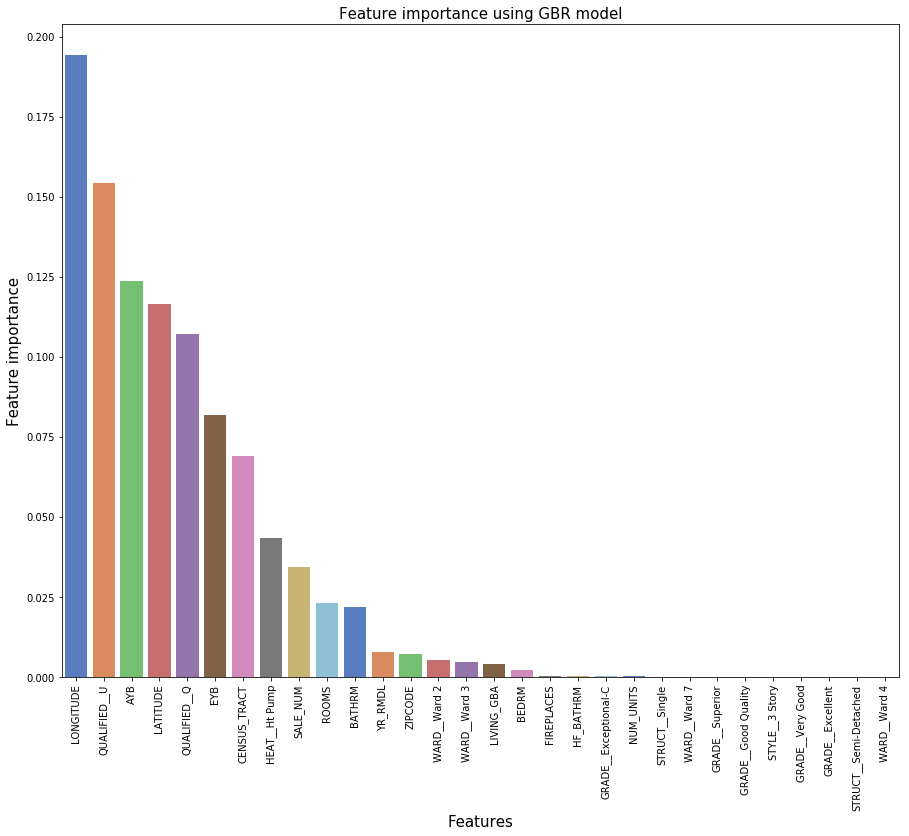

In [36]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=feature_importances_gbr3.index, y=feature_importances_gbr3.importance,palette="muted")
plt.xlabel('Features', fontsize=15)
plt.ylabel('Feature importance', fontsize=15)
plt.title('Feature importance using GBR model', fontsize=15)

print("From all the above models, we found Gradient boosting regression is the best model with R2 of 96.94%")